In [1]:
import numpy as np
from utils_rnn import *

In [2]:
# Data cleaning

# combined_names.txt contains all the Nepali names
data = open('combined_names.txt', 'r').read()
data= data.lower()
characters = list(set(data))
characters = sorted(characters)

data_size, vocab_size = len(data), len(characters)
print('%d total characters & %d unique characters.' % (data_size, vocab_size))



59587 total characters & 27 unique characters.


In [3]:
# Adding indexes -- > characters and reverse
char_to_idx = { ch:i for i,ch in enumerate(characters) }
idx_to_char = { i:ch for i,ch in enumerate(characters) }

In [4]:
def sample(parameters, char_to_idx):
    
    
    Waa, Wax, Wya, by, b = parameters['Waa'], parameters['Wax'], parameters['Wya'], parameters['by'], parameters['b']
    vocab_size = by.shape[0]
    n_a = Waa.shape[1]
    x = np.zeros((len(char_to_idx),1))
    a_prev = np.zeros((n_a,1))
        # Create an empty list of indices, this is the list which will contain the list of indices of the characters to generate (≈1 line)
    indices = []
    # idx is the index of the one-hot vector x that is set to 1
    # All other positions in x are zero.
    # We will initialize idx to -1
    idx = -1 
    counter = 0
    newline_character = char_to_idx['\n']
    while (idx != newline_character and counter != 15) : 
        a = np.tanh(np.dot(Wax,x) + np.dot(Waa,a_prev) + b)
        z = np.dot(Wya,a) + by
        y = softmax(z)
        # Ssampling the indices from the probability distribution of y
        idx = np.random.choice(range(len(y)), p = y.ravel())
        indices.append(idx)
        
        # X[idx] = 1 because X will be passed to the next timestep as Y<t>
        x = np.zeros((vocab_size,1))
        x[idx] = 1
        a_prev = a
        if (counter == 15):
            indices.append(char_to_idx['\n'])
    
    return indices

In [25]:
# Defining a model
def model(data, filename, idx_to_char, char_to_idx, num_iter = 35000, n_a = 50, nepali_name = 10, vocab_size=27):
    
    n_x, n_y = vocab_size, vocab_size
    loss = -np.log(1.0/vocab_size)*nepali_name
    loss_points = []
    
    parameters = initialize_parameters(n_a, n_x, n_y)
    with open(filename) as f:
        training_examples = f.readlines()
    training_examples = [x.lower().strip() for x in training_examples]
    # Initialize the hidden state 
    a_prev = np.zeros((n_a, 1))
    np.random.shuffle(training_examples)
    
    for j in range(num_iter):
        # Mod ie. % returns back to index 0 once we reach end of the examples
        idx = j % len(training_examples)
        # Get an example from idx 
        single_training_example = training_examples[idx]
        # Get all the characters from the single training example
        single_training_character = [char for char in single_training_example]
        # Get the indexes of the characters in the single training example
        single_example_idx = [char_to_idx[ch] for ch in single_training_character]
        # None prepended to set the input vector to 0 vector
        X = [None] + single_example_idx
        idx_newline = char_to_idx["\n"]
        Y = X[1:] + [idx_newline]
        
        curr_loss, gradients, a_prev = optimize(X,Y,a_prev,parameters,learning_rate=0.01)
        loss = smooth(loss, curr_loss)
        
        if j % 2000 == 0:
            
            print('Iteration: %d, Loss: %f' % (j, loss) + '\n')
            loss_points.append(loss)
            
            for name in range(nepali_name):
                
                # Sample indices and print them
                sampled_indices = sample(parameters, char_to_idx)
                print_sample(sampled_indices, idx_to_char)
      
            print('\n')
        
    return loss_points

        

In [27]:
file_name = "combined_names.txt"
model_loss = model(data,file_name,idx_to_char, char_to_idx, num_iter=320000)

Iteration: 0, Loss: 32.948480

Dcrzesjbvkibbqkamkputmrtgxfswopolmtnvofbchkcntrcfnepuy
Scxufngwusgitgtvgujztv
Agvhozntmnrrx
Exjr
Dnpmjftjgdfuxzzboidxgdyowjmgiwktlosuncjrslqwedhcmekaxdopmlkcfgxjuhsdevnenvazwudoefeahlyddfwxlbnt
Ceayaqjz

Idothkhamiqwylwjnzlxpdrlmxtzhczeifzuiyhvezfb
Xfnftfrgy
Mevbysouobdylerbgpmiejljlsfimwml


Iteration: 2000, Loss: 21.513197



Uj
Axzerann
Kanow
Inittkwsalria

Njorushipemifvvsam
Ulrjal



Iteration: 4000, Loss: 18.533394

Ja
Surinun
Randhasdin
U
Yini
Naklilin
Kebilan
Rueka
Ano
A


Iteration: 6000, Loss: 17.675873

Runishar
Sunay
Pamasi
Yaman
Rate
Rekdishya
Richeneta
Suupkebi
Rabisuwa
Puomramn


Iteration: 8000, Loss: 17.010033

Drinkat
Hakalsoksheedadakmilla
Covab
Sivift
Nades
Nishabheenu
Pogit
Mlomen
Sukechamikem
Shheekamaa


Iteration: 10000, Loss: 16.564157

Shaenneenon
Xzikhim
Ripeeba
Sun
Lap
Prjindin
Andir
Didesh
Avil
Misha


Iteration: 12000, Loss: 16.312205

Kama
Amish
Dimapyanduna
Sengutukshijt
Milaya
Romopeshan
Balahnira
Chitradhikaninal
Arih
Shu

In [34]:
import matplotlib.pyplot as plt
num_iteration = list(range(0, len(model_loss)))

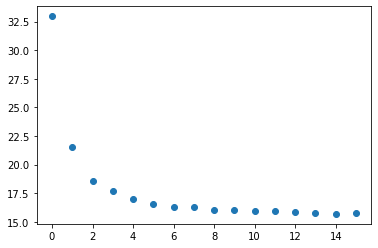

In [35]:
plt.scatter(num_iteration,model_loss)

In [33]:
len(model_loss)

16